In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.full.common import *


In [2]:
# load questionresponses and expand the response columns to contain "lastentry" and "secondlastentry" instead of 'A', 'B' or 'BOTH'
questionresponses = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\questionresponses.json").readlines()).apply(json.loads))
questionresponses = expand_questionresponses(questionresponses)

In [3]:
questionresponses = preprocess_questionresponses(questionresponses)

In [4]:
def basic_heatmap(data):
    plt.figure()
    ax = sns.heatmap(
        data, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        fmt=".2f"
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=0,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation = 0,
        horizontalalignment='right'
    );

                  fun  frustrating  challenging
fun          1.000000    -0.363152     0.426678
frustrating -0.363152     1.000000    -0.070093
challenging  0.426678    -0.070093     1.000000
                  fun  frustrating  challenging
fun          1.000000    -0.391550     0.455402
frustrating -0.391550     1.000000    -0.068505
challenging  0.455402    -0.068505     1.000000
                  fun  frustrating  challenging
fun          1.000000    -0.379127     0.434951
frustrating -0.379127     1.000000    -0.058252
challenging  0.434951    -0.058252     1.000000


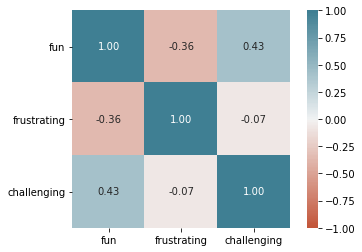

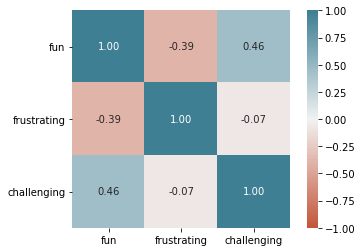

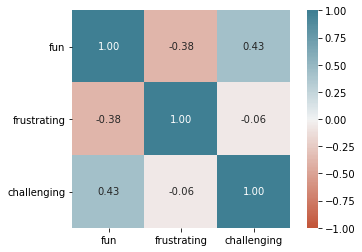

In [5]:
ffc = questionresponses[['fun', 'frustrating', 'challenging']]    
#ffc = ffc.applymap(lambda x: thing(x))

# only values relevant to 'secondlastentry'
a = ffc
a = a.applymap(lambda x: 1 if 'secondlastentry' in ( x if isinstance(x, list) else [x]) else 0)
a_corr = a.corr()
print(a_corr)
basic_heatmap(a_corr)

# only values relevant to 'secondlastentry'
b = ffc
b = b.applymap(lambda x: 1 if 'lastentry' in ( x if isinstance(x, list) else [x]) else 0)
b_corr = b.corr()
print(b_corr)
basic_heatmap(b_corr)

# entries relevant to both 'secondlastentry' and 'lastentry'
a_b = pd.concat([a,b])
a_b_corr = a_b.corr()
print(a_b_corr)
basic_heatmap(a_b_corr)

plt.savefig('graphs/notebook/ffc_heatmap.png')